# HOUSE PRICE PREDICTION

## Importing the libraries

In [460]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [461]:
dataset = pd.read_csv('kc_house_data.csv')

In [462]:
dataset.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [463]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [464]:
dataset.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [465]:
X = dataset[['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

In [466]:
y = dataset['price'].values

## Splitting the dataset into the Training set and Test set

In [467]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


Training the Multiple Linear Regression model on the Training set
---



In [468]:
from sklearn.linear_model import LinearRegression
mul_regressor = LinearRegression()
mul_regressor.fit(X_train, y_train)

LinearRegression()

Predicting the Test set results

In [469]:
y_pred = mul_regressor.predict(X_test)
y_test1 = y_test
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test1.reshape(len(y_test1),1)),1))

[[ 378448.22  297000.  ]
 [1539749.37 1578000.  ]
 [ 544459.9   562100.  ]
 ...
 [ 359857.21  369950.  ]
 [ 207005.83  300000.  ]
 [ 433639.79  575950.  ]]


Evaluating the Model Performance

In [470]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6949310095118022

## Random Forest Regression model on the Training set

In [471]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 50, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=0)

## Predicting the Test set results

In [472]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 321129.5   297000.  ]
 [1748142.8  1578000.  ]
 [ 530063.    562100.  ]
 ...
 [ 412540.    369950.  ]
 [ 234155.68  300000.  ]
 [ 482580.54  575950.  ]]


## Evaluating the Model Performance

In [473]:
r2_score(y_test, y_pred)

0.8913673334379054

Cheacking the importance of different features

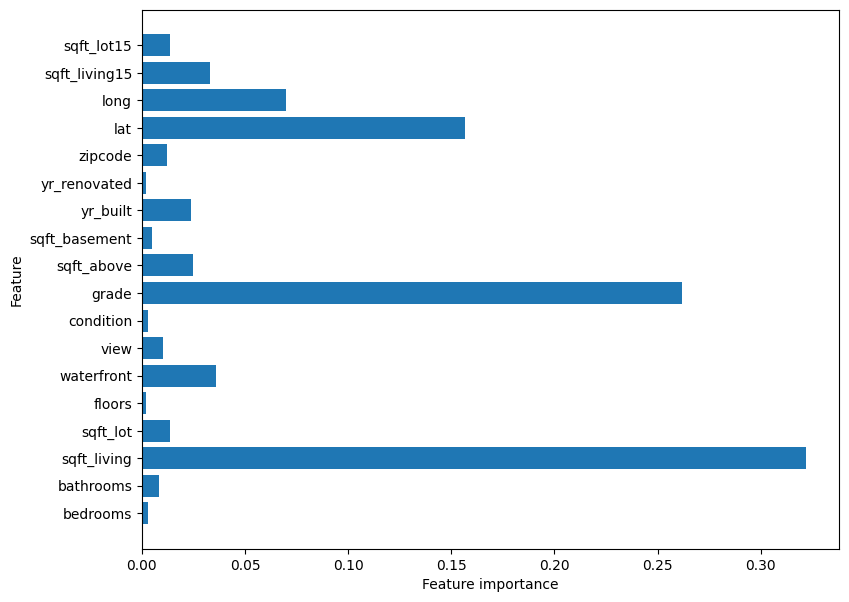

In [474]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), regressor.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

# Support Vector Regression (SVR)

In [475]:
y = y.reshape(len(y),1)

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Feature Scaling

In [477]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
y_train = sc_y.fit_transform(y_train)

Training the SVR model on the Training set

In [478]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting results

In [479]:
y_pred = sc_y.inverse_transform(regressor.predict(sc_X.transform(X_test)).reshape(-1,1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 341703.91  297000.  ]
 [1727953.24 1578000.  ]
 [ 545056.65  562100.  ]
 ...
 [ 381829.78  369950.  ]
 [ 270722.56  300000.  ]
 [ 470404.4   575950.  ]]


Evaluating performence

In [480]:
r2_score(y_test, y_pred)

0.7995637815126124

# RESULT

  
**MULTIPLE LINEAR REGRESSION**

```
# R2 Score = 0.6949310095118022
```

**Random Forest Regression**


```
# R2 Score = 0.8913673334379054
```

**Support Vector Regression (SVR)**


```
# R2 Score = 0.7995637815126124
```








